In [1]:
import sys
sys.path.append('../')

from modules.utils.imports import *
from modules.binn.model_wrapper import model_wrapper
from modules.binn.build_binns import BINN_tl
from modules.loaders.format_data import format_data

uv_shape: torch.Size([10000, 2])
pde_loss_shape: torch.Size([10000, 1])
inverse_densities_shape: torch.Size([10000])
uv_shape: torch.Size([10000, 2])
pde_loss_shape: torch.Size([10000, 1])
inverse_densities_shape: torch.Size([10000])
uv_shape: torch.Size([10000, 2])
pde_loss_shape: torch.Size([10000, 1])
inverse_densities_shape: torch.Size([10000])
uv_shape: torch.Size([10000, 2])
pde_loss_shape: torch.Size([10000, 1])
inverse_densities_shape: torch.Size([10000])
uv_shape: torch.Size([10000, 2])
pde_loss_shape: torch.Size([10000, 1])


KeyboardInterrupt: 

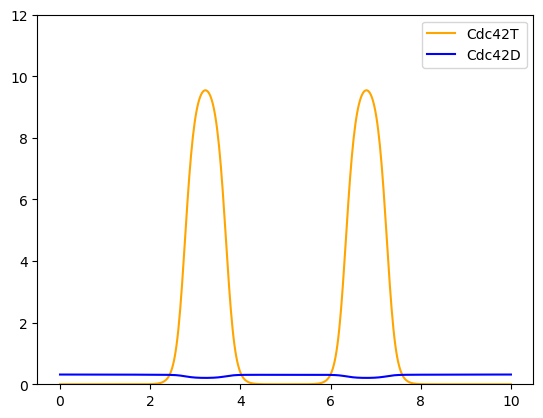

In [2]:
# Get GPU
device = torch.device('cpu')

# Load in data
path = '/work/users/s/m/smyersn/elston/projects/kinetics_binns/data/'
file_name = 'spikes_data.npz'

# input: [x, t], output: [u, v]
inputs, output_u, output_v, shape_u, shape_v = format_data(path+file_name)
outputs = np.concatenate((output_u, output_v), axis=1)

def to_torch(ndarray):
    arr = torch.tensor(ndarray, dtype=torch.float)
    arr.requires_grad_(True)
    arr = arr.to(device)
    return arr

# split into train/val and convert to torch
N = len(inputs)
split = int(0.8*N)
p = np.random.permutation(N)
x_train = to_torch(inputs[p[:split]])
y_train = to_torch(outputs[p[:split]])
x_val = to_torch(inputs[p[split:]])
y_val = to_torch(outputs[p[split:]])
inputs = to_torch(inputs)
outputs = to_torch(outputs)

# initialize model
binn = BINN_tl()
binn.to(device)

# compile 
parameters = binn.parameters()
opt = torch.optim.Adam(parameters, lr=1e-3)
model = model_wrapper(
    model=binn,
    optimizer=opt,
    loss=binn.loss,
    augmentation=None,
    save_name=f'test')

epochs = 100
batch_size = 5000 # 25% of split
rel_save_thresh = 0.05

# train jointly
model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=None,
    verbose=1,
    validation_data=[x_val, y_val],
    early_stopping=5000,
    rel_save_thresh=rel_save_thresh)

In [ ]:
binn = BINN()
for param in binn.parameters():
    print(param)

Parameter containing:
tensor([[-0.2284, -0.5271],
        [ 0.2015, -0.2470],
        [ 0.4906, -0.2975],
        [-0.1209,  0.4850],
        [-0.0653, -0.4091],
        [ 0.6225, -0.5113],
        [-0.1701, -0.1521],
        [-0.6368,  0.5473],
        [-0.2831, -0.3939],
        [-0.4182, -0.1133],
        [ 0.6281, -0.4003],
        [ 0.6124, -0.5664],
        [-0.1595, -0.5811],
        [-0.4710,  0.3224],
        [-0.0875, -0.6882],
        [ 0.5499,  0.0467],
        [ 0.2765,  0.3176],
        [ 0.6553,  0.1091],
        [-0.0347, -0.2317],
        [-0.0884, -0.4302],
        [-0.4542, -0.4792],
        [ 0.0802,  0.5786],
        [ 0.4802, -0.4942],
        [-0.2067, -0.0445],
        [-0.0240, -0.2793],
        [-0.1376, -0.2601],
        [ 0.6160,  0.0878],
        [-0.4769,  0.1265],
        [ 0.4277, -0.1213],
        [-0.5612,  0.5060],
        [-0.5663,  0.3209],
        [ 0.5762,  0.4276],
        [-0.6265, -0.6719],
        [-0.1408, -0.0035],
        [-0.2776, -0.1498]

In [ ]:
binn=BINN()
print(binn.state_dict())

binn.load_state_dict(new_dict, strict=False)
print(binn.state_dict())

OrderedDict([('surface_fitter.mlp.MLP.0.weight', tensor([[-0.6308,  0.5240],
        [ 0.0472,  0.0586],
        [-0.5611,  0.6084],
        [-0.2318, -0.1154],
        [-0.2460,  0.2608],
        [-0.2813, -0.6962],
        [-0.1238,  0.3585],
        [ 0.2717,  0.0629],
        [-0.4427,  0.5183],
        [ 0.2285,  0.6404],
        [ 0.4003,  0.1095],
        [-0.2782, -0.2322],
        [ 0.3502,  0.5579],
        [-0.3121,  0.6701],
        [ 0.4605, -0.3611],
        [ 0.5898,  0.0142],
        [-0.0839, -0.0177],
        [ 0.0202, -0.5865],
        [ 0.5854,  0.6063],
        [ 0.7068, -0.1508],
        [-0.5177,  0.5531],
        [ 0.3728, -0.5348],
        [-0.5026, -0.3836],
        [ 0.1721, -0.5341],
        [-0.4730, -0.1534],
        [-0.4595,  0.2261],
        [ 0.4156, -0.1515],
        [-0.5344, -0.0459],
        [-0.5464,  0.4323],
        [ 0.0757,  0.0626],
        [-0.3420,  0.2347],
        [-0.4833, -0.5923],
        [-0.4930,  0.3511],
        [ 0.3130,  0.2042],

In [ ]:
new_dict = {key: val for key, val in vals.items() if 'reaction' in key}
binn.load_state_dict(new_dict, strict=False)

In [ ]:
prior_model_name = f"/work/users/s/m/smyersn/elston/projects/kinetics_binns/development/binn_testing/debugged_development/fixed_grad_and_constraints/model_weights_best_val_model" 
vals = torch.load(prior_model_name, map_location=device)
print(vals)

OrderedDict([('surface_fitter.mlp.MLP.0.weight', tensor([[ 1.2383, -0.0625],
        [-1.1461,  0.0415],
        [-0.2735, -0.0386],
        [-0.0485, -0.1554],
        [ 0.0379,  0.0848],
        [ 1.9868,  0.7915],
        [-0.5116,  0.0509],
        [-0.4885, -0.0122],
        [ 0.5174, -0.0653],
        [-0.4332, -0.1029],
        [-0.0441, -0.1503],
        [ 0.4477, -0.0447],
        [ 0.9900,  0.0097],
        [ 0.3717, -0.0641],
        [ 2.7240, -0.1265],
        [-0.1195, -0.1134],
        [-0.6309, -0.5061],
        [ 0.5315, -0.0634],
        [-0.2196, -0.0648],
        [-0.1100, -0.1188],
        [ 0.4088,  2.0895],
        [-0.8966,  0.5472],
        [-0.4279, -0.1254],
        [ 1.0536, -0.0135],
        [ 0.0398,  0.1468],
        [-0.5552,  0.0654],
        [ 0.0274, -0.2147],
        [ 0.5987, -0.0905],
        [-0.8494,  0.3921],
        [ 0.6516, -0.3149],
        [-0.4218,  0.0236],
        [-0.9018,  0.3758],
        [ 0.0657,  0.0645],
        [-0.0924, -0.1270],

Epoch 0 | Train loss = 3.5150e+02 | Val loss = 2.3894e+02 | Remaining = 0:00:21           
Epoch 9 | Train loss = 2.0004e+00 | Val loss = 1.9641e+00 | Elapsed = 0:00:21           
Epoch 0 | Train loss = 1.2046e+01 | Val loss = 8.6128e+00 | Remaining = 0:00:49           
Epoch 9 | Train loss = 3.7483e+00 | Val loss = 3.7103e+00 | Elapsed = 0:00:55           
Epoch 0 | Train loss = 4.2498e+00 | Val loss = 4.2250e+00 | Remaining = 0:00:48           
Epoch 9 | Train loss = 3.7633e+00 | Val loss = 3.7684e+00 | Elapsed = 0:00:53           
Epoch 0 | Train loss = 6.7455e+00 | Val loss = 6.1164e+00 | Remaining = 0:00:12           
Epoch 9 | Train loss = 2.5937e+00 | Val loss = 2.5415e+00 | Elapsed = 0:00:13           


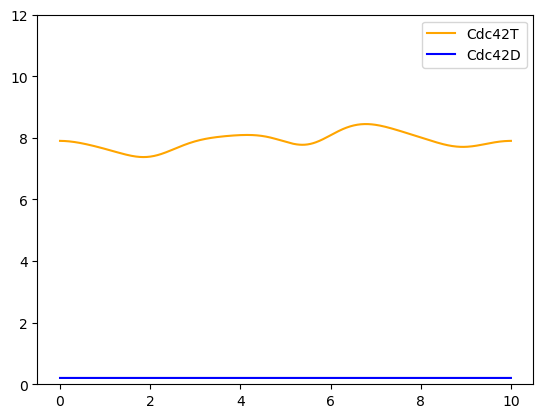

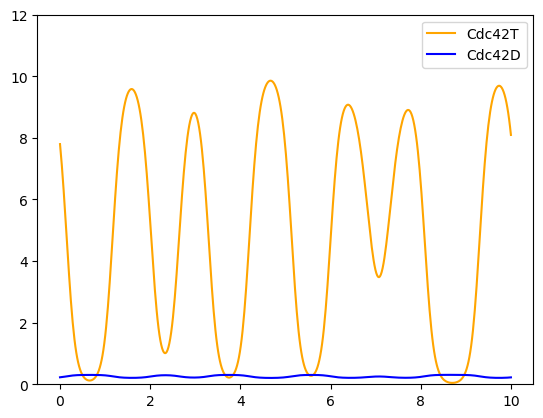

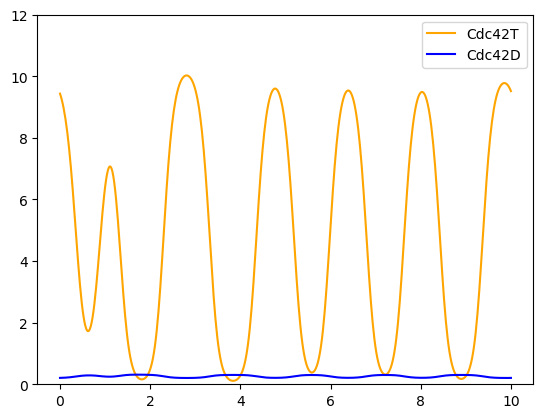

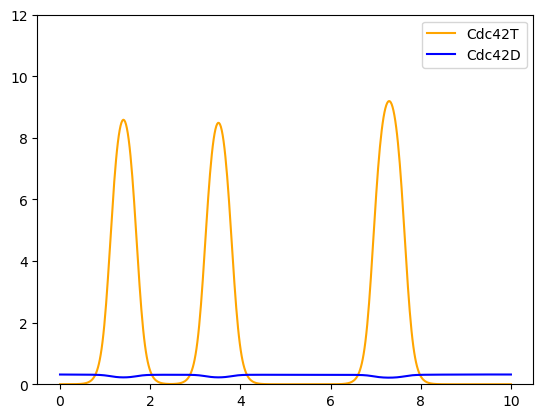

In [ ]:
def to_torch(ndarray):
    arr = torch.tensor(ndarray, dtype=torch.float)
    arr.requires_grad_(True)
    arr = arr.to(device)
    return arr

# initialize model
device = torch.device('cpu')
binn = BINN()
binn.to(device)

# define training parameters
epochs = int(10)
batch_size = 5000 # 25% of split
rel_save_thresh = 0.05

# define training data
training_data_path = '/work/users/s/m/smyersn/elston/projects/kinetics_binns/data/'
training_data_files = ['high_equal_random_data.npz', 'high_u_random_data.npz', 
              'high_v_random_data.npz', 'random_data.npz']

# training loop
for i in range(len(training_data_files)):
    model_name = training_data_files[i].split('.')[0]
    
    # load in training data
    inputs, output_u, output_v, shape_u, shape_v = format_data(training_data_path+training_data_files[i])
    outputs = np.concatenate((output_u, output_v), axis=1)

    # split into train/val and convert to torch
    N = len(inputs)
    split = int(0.8*N)
    p = np.random.permutation(N)
    x_train = to_torch(inputs[p[:split]])
    y_train = to_torch(outputs[p[:split]])
    x_val = to_torch(inputs[p[split:]])
    y_val = to_torch(outputs[p[split:]])
    inputs = to_torch(inputs)
    outputs = to_torch(outputs)

    # compile
    if i == 0: 
        parameters = binn.parameters()
    else:
        prior_model_name = f"{training_data_files[i - 1].split('.')[0]}_best_val_model" 
        prior_params = torch.load(prior_model_name, map_location=device)
        prior_reaction_dict = {key: val for key, val in vals.items() if 'reaction' in key}
        binn.load_state_dict(prior_reaction_dict, strict=False)

    opt = torch.optim.Adam(list(binn.parameters()), lr=1e-3)
    model = model_wrapper(
        model=binn,
        optimizer=opt,
        loss=binn.loss,
        augmentation=None,
        save_name=model_name)

    epochs = int(10)
    batch_size = 5000 # 25% of split
    rel_save_thresh = 0.05

    # train jointly
    model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=None,
        verbose=1,
        validation_data=[x_val, y_val],
        early_stopping=5000,
        rel_save_thresh=rel_save_thresh)